In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Step 1: Load Data
file_path = r'C:\Users\LENOVO\Downloads\first_project.csv'
df = pd.read_csv(file_path)

# Check the columns to confirm the names are correct
print(df.columns)


Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')


In [2]:
# First thing the preprocessing
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check data types
print("\nData Types:\n", df.dtypes)

# Trim any whitespace from column names
df.columns = df.columns.str.strip()

# Print the first few rows to inspect the data
print("\nData Preview:\n", df.head())

Missing Values:
 Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

Data Types:
 Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C       

In [3]:
# Define a function to handle outliers using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

# Apply the function to numerical columns
numerical_columns = ['number of adults', 'number of children', 'number of weekend nights', 
                     'number of week nights', 'lead time', 'average price']
for col in numerical_columns:
    df = handle_outliers(df, col)

# Print to see if there were any changes
print(df.describe())


       number of adults  number of children  number of weekend nights  \
count           36285.0             36285.0              36285.000000   
mean                2.0                 0.0                  0.810087   
std                 0.0                 0.0                  0.867286   
min                 2.0                 0.0                  0.000000   
25%                 2.0                 0.0                  0.000000   
50%                 2.0                 0.0                  1.000000   
75%                 2.0                 0.0                  2.000000   
max                 2.0                 0.0                  5.000000   

       number of week nights  car parking space     lead time      repeated  \
count           36285.000000       36285.000000  36285.000000  36285.000000   
mean                2.178145           0.030977     83.767893      0.025630   
std                 1.290708           0.173258     81.662186      0.158032   
min                 0.0000

E:\Data Science Software\anaconda\envs\alx\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


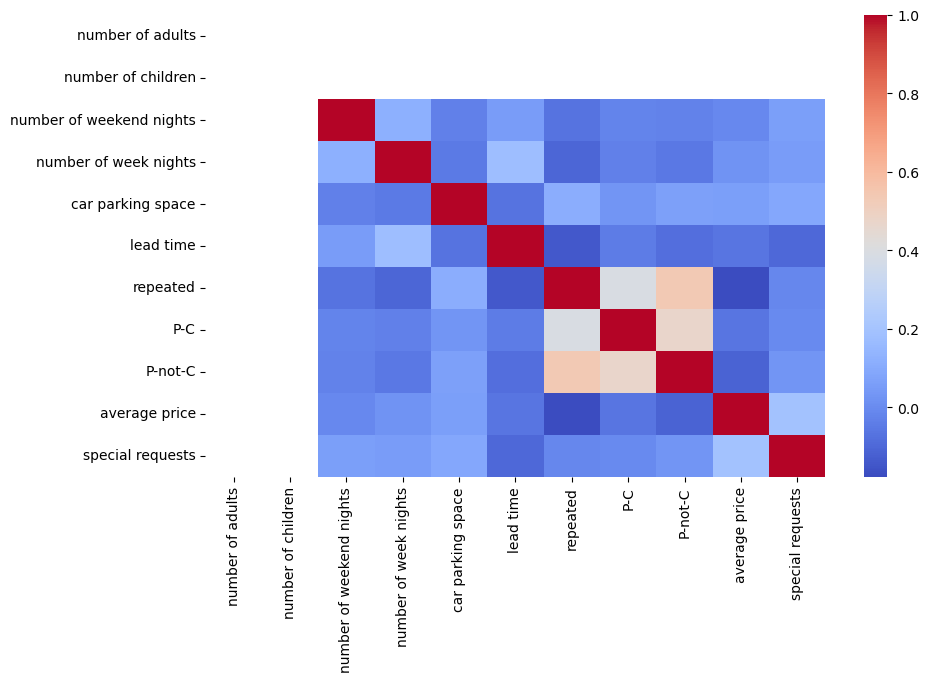

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numerical columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Check correlation between numerical variables
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Feature Extraction (Example: Create a total nights feature) for simplifiying relationship and reducing noise
df['total nights'] = df['number of weekend nights'] + df['number of week nights']

# Drop irrelevant features
df = df.drop(columns=['Booking_ID', 'date of reservation'])


In [5]:
# Map the 'booking status' column to binary values: 'Not_Canceled' = 1, 'Canceled' = 0
df['booking status'] = df['booking status'].map({'Not_Canceled': 1, 'Canceled': 0})

# Step 2: One-Hot Encode Categorical Columns
df = pd.get_dummies(df, columns=['type of meal', 'room type', 'market segment type'], drop_first=True)

# Step 3: Handle Numeric Columns (Normalize)
numeric_columns = ['number of adults', 'number of children', 'number of weekend nights', 
                   'number of week nights', 'lead time', 'average price', 'special requests']

scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Step 4: Train-Test Split
X = df.drop(columns=['booking status'])  # Features
y = df['booking status']                # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Logistic Regression Model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Step 6: Accuracy Calculation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.74      0.62      0.68      3594
           1       0.83      0.90      0.86      7292

    accuracy                           0.80     10886
   macro avg       0.79      0.76      0.77     10886
weighted avg       0.80      0.80      0.80     10886



In [7]:
# Sample model: RandomForestClassifier
rf_model = RandomForestClassifier()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [8]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
model = RandomForestClassifier()

# Recursive Feature Elimination
rfe = RFE(estimator=model, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)

# Selected features
selected_features = X_train.columns[rfe.support_]


In [9]:
import pickle

# Save the model
with open('hotel_booking_model.pkl', 'wb') as file:
    pickle.dump(grid_search.best_estimator_, file)

# Load the model
with open('hotel_booking_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [10]:
from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# Load the pre-trained model
with open('hotel_booking_model.pkl', 'rb') as file:
    model = pickle.load(file)

@app.route('/predict', methods=['POST'])
def predict():
    # Get the input data from the request
    data = request.get_json(force=True)
    
    # Assume data is in the correct format
    prediction = model.predict([list(data.values())])
    
    # Convert the prediction to a label
    booking_status = 'Not Canceled' if prediction == 0 else 'Canceled'
    
    return jsonify({'booking_status': booking_status})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
